In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import tensorflow as tf
import random 
import cv2

In [2]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Activation, Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [3]:
data1 = []
label1 = []
n = 128 
for i in os.listdir("Project 2 Dataset"):
    for j in os.listdir(os.path.join('Project 2 Dataset', i)):
        if j.endswith("jpg"):
            label1.append(i)
            img = cv2.imread(os.path.join('Project 2 Dataset', i, j))
            img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            im = cv2.resize(img_rgb, (n,n))
            data1.append(im)
        else:
            continue

In [55]:
data = np.array(data1)
label = np.array(label1)

In [56]:
len(data)

4327

In [57]:
len(label)

4327

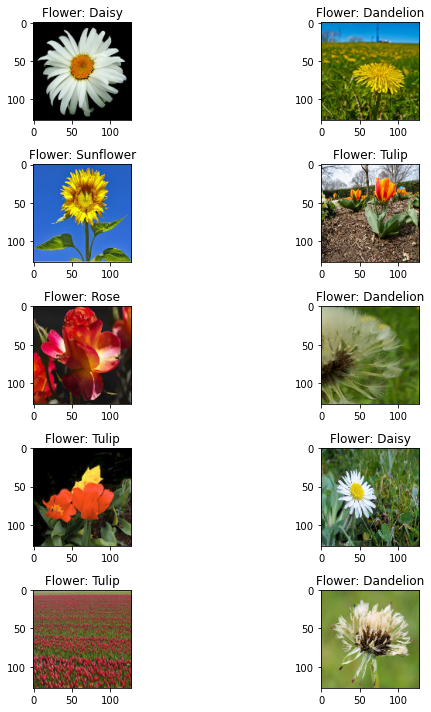

In [58]:
fig,ax=plt.subplots(5,2)
fig.set_size_inches(10,10)
for i in range(5):
    for j in range (2):
        l=random.randint(0,len(label))
        ax[i,j].imshow(data[l])
        ax[i,j].set_title('Flower: '+label[l])
        
plt.tight_layout()

In [59]:
encoder = LabelEncoder()
Y = encoder.fit_transform(label)
Y = to_categorical(Y,5)
X = data/255

In [60]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=20)

In [61]:
model = Sequential()
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',activation ='relu', input_shape = (n,n,3)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(5, activation = "softmax"))

In [62]:
datagen = ImageDataGenerator(
        rotation_range=20,
        zoom_range = 0.25,
        width_shift_range=0.3,
        height_shift_range=0.3,
        horizontal_flip=True,
        vertical_flip=True)

datagen.fit(x_train.reshape(-1,1))

ValueError: Input to `.fit()` should have rank 4. Got array with shape: (170115072, 1)

In [63]:
from tensorflow.keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
model.compile(optimizer=Adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

C:\Users\pranjali\anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


In [64]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 128, 128, 64)      1792      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 64, 64, 64)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 64, 64, 128)       73856     
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 64, 64, 128)       147584    
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 64, 64, 128)       147584    
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 32, 32, 128)       0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 131072)           

In [65]:
 fit = model.fit(x_train,y_train,epochs=3,batch_size=30,validation_data = (x_test,y_test))

Epoch 1/3
116/116 [==============================] - 399s 3s/step - loss: 1.5330 - accuracy: 0.3068 - val_loss: 1.2899 - val_accuracy: 0.4423
Epoch 2/3
116/116 [==============================] - 425s 4s/step - loss: 1.2300 - accuracy: 0.4661 - val_loss: 1.1260 - val_accuracy: 0.4988
Epoch 3/3
116/116 [==============================] - 332s 3s/step - loss: 1.1194 - accuracy: 0.5377 - val_loss: 1.0406 - val_accuracy: 0.5843


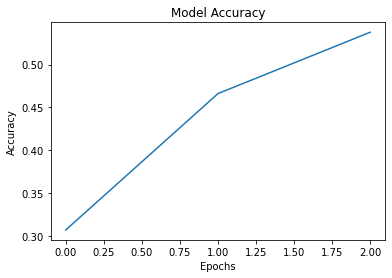

In [66]:
plt.plot(fit.history['accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.show()

In [67]:
pred=model.predict(x_test)

In [68]:
pred_digits=np.argmax(pred,axis=1)

In [69]:
pred_digits

array([1, 1, 4, 1, 2, 1, 4, 0, 1, 3, 3, 4, 0, 3, 1, 3, 1, 0, 3, 1, 2, 2,
       1, 1, 0, 1, 1, 3, 1, 3, 3, 3, 1, 1, 1, 1, 1, 3, 3, 1, 1, 4, 1, 4,
       4, 4, 2, 1, 4, 4, 4, 4, 4, 1, 1, 1, 4, 4, 3, 4, 3, 4, 2, 3, 4, 1,
       1, 1, 0, 1, 2, 1, 3, 3, 0, 1, 3, 2, 4, 4, 4, 1, 4, 4, 1, 2, 2, 1,
       4, 2, 2, 3, 1, 2, 1, 4, 0, 1, 1, 4, 1, 0, 1, 3, 1, 1, 4, 3, 0, 1,
       3, 1, 1, 3, 4, 3, 4, 4, 1, 1, 0, 3, 1, 0, 0, 1, 3, 3, 2, 0, 4, 1,
       4, 1, 1, 2, 1, 2, 1, 3, 1, 1, 1, 4, 3, 1, 1, 4, 1, 1, 3, 4, 0, 4,
       2, 0, 4, 1, 0, 1, 1, 3, 2, 4, 4, 1, 1, 2, 2, 0, 2, 1, 3, 4, 1, 1,
       0, 1, 2, 4, 1, 1, 3, 1, 3, 3, 4, 4, 2, 4, 3, 1, 1, 2, 3, 3, 1, 0,
       0, 3, 0, 3, 1, 1, 4, 1, 1, 4, 4, 4, 1, 4, 4, 1, 3, 0, 1, 0, 1, 4,
       4, 1, 1, 0, 2, 1, 0, 2, 2, 3, 0, 4, 1, 1, 4, 4, 3, 1, 1, 3, 4, 1,
       1, 1, 3, 0, 1, 1, 2, 4, 3, 0, 2, 3, 1, 1, 1, 2, 0, 3, 4, 3, 4, 1,
       3, 0, 2, 3, 1, 1, 1, 2, 3, 1, 0, 1, 1, 3, 1, 1, 3, 1, 4, 3, 3, 1,
       0, 3, 1, 1, 3, 1, 3, 3, 1, 3, 1, 1, 0, 4, 0,

In [70]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
r2_score(y_test,pred)

0.3111723975408662

In [71]:
model.save("Image.h5")

In [24]:
Saved_model = tf.keras.models.load_model("Image.h5")